In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("dupremoved_trackdata.csv")
df.head()

,name,artist,album,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre
0,'Long As You Know You're Living Yours,Keith Jarrett,Belonging,46,0.605,0.376,5,-14.978,1,0.0322,0.253,0.20700,0.1170,0.948,131.927,5z7deaTe21B7QVPhSDouL1,370867,4,jazz
1,'Ode To Joy' From Symphony No. 9 In D Minor 'C...,Ludwig van Beethoven,Hallelujah - 35 Great Sacred Choruses,30,0.266,0.516,2,-12.527,1,0.0498,0.846,0.47200,0.3050,0.236,159.184,3mhzXvn3dqhC3Z3k6l4kEz,199693,4,orchestral
2,'Round Midnight,Thelonious Monk,Monk Alone: The Complete Columbia Solo Studio ...,0,0.518,0.419,8,-8.547,1,0.0497,0.944,0.82000,0.2470,0.259,78.170,1kAaGwsZioS6AoP78CLbWr,228333,4,jazz
3,'Round Midnight,Thelonious Monk,"Genius Of Modern Music (Vol.1, Expanded Edition)",52,0.542,0.320,8,-9.975,1,0.0387,0.907,0.64900,0.0609,0.206,116.648,1wl5b2lw3YagQtZiYZbQWP,193840,4,jazz
4,"'Round Midnight (feat. John Coltrane, Red Garl...",Miles Davis,'Round About Midnight,51,0.494,0.182,10,-11.116,0,0.0443,0.790,0.00036,0.1290,0.210,112.689,5vb7At47uO0yPGfmYnAHuw,355333,4,jazz


In [4]:
df1 = df.iloc[:,4:].drop('id', axis = 1)
df1


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.605,0.376,5,-14.978,1,0.0322,0.25300,0.20700,0.1170,0.948,131.927,370867,4,jazz
1,0.266,0.516,2,-12.527,1,0.0498,0.84600,0.47200,0.3050,0.236,159.184,199693,4,orchestral
2,0.518,0.419,8,-8.547,1,0.0497,0.94400,0.82000,0.2470,0.259,78.170,228333,4,jazz
3,0.542,0.320,8,-9.975,1,0.0387,0.90700,0.64900,0.0609,0.206,116.648,193840,4,jazz
4,0.494,0.182,10,-11.116,0,0.0443,0.79000,0.00036,0.1290,0.210,112.689,355333,4,jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,0.744,0.589,5,-1.218,0,0.0359,0.36000,0.00000,0.1190,0.242,127.051,286236,4,hiphop
6096,0.520,0.493,11,-11.360,0,0.0478,0.91100,0.30500,0.1930,0.263,160.124,144500,4,R&B
6097,0.396,0.554,0,-5.048,1,0.0488,0.22200,0.00000,0.6120,0.170,117.384,272501,4,hiphop
6098,0.335,0.849,0,-6.927,1,0.3210,0.00193,0.25400,0.0928,0.256,181.716,399267,3,metal


In [5]:
features = df1.iloc[:,:-1]
corrvals = features.corr()

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt

<AxesSubplot:>

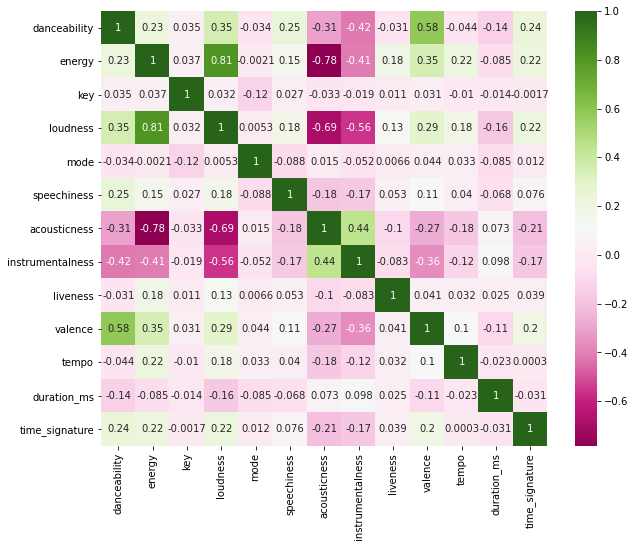

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
sn.heatmap(corrvals, annot = True, ax = ax, cmap = "PiYG")

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features.columns
    
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                            for i in range(len(features.columns))]
    
    print(vif_data)

In [33]:
VIF(features)

             feature        VIF
0       danceability  19.786339
1             energy  25.489201
2                key   3.206520
3           loudness  11.935169
4               mode   2.733402
5        speechiness   2.219646
6       acousticness   4.569369
7   instrumentalness   2.069367
8           liveness   2.667572
9            valence   8.158827
10             tempo  17.557601
11       duration_ms   9.524995
12    time_signature  67.168908


In [32]:
VIF(features.drop(["time_signature", "energy","danceability", "tempo"], axis=1))

            feature       VIF
0               key  2.908022
1          loudness  8.242339
2              mode  2.443521
3       speechiness  1.988494
4      acousticness  3.490298
5  instrumentalness  1.943515
6          liveness  2.438960
7           valence  4.289747
8       duration_ms  6.586163


In [40]:
count = pd.DataFrame()
genres = np.unique(df1.iloc[:,-1])
count["genres"] = genres
counts = []
for genre in genres:
    counts.append(np.sum(df1["genre"]==genre))
count["counts"]=counts
count

,genres,counts
0,R&B,499
1,country,527
2,disco,483
3,electronic,488
4,folk,522
5,hiphop,494
6,jazz,613
7,metal,489
8,orchestral,507
9,pop,473


In [41]:
np.sum(df1["key"]==-1)

0

In [9]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(features)


DBSCAN()

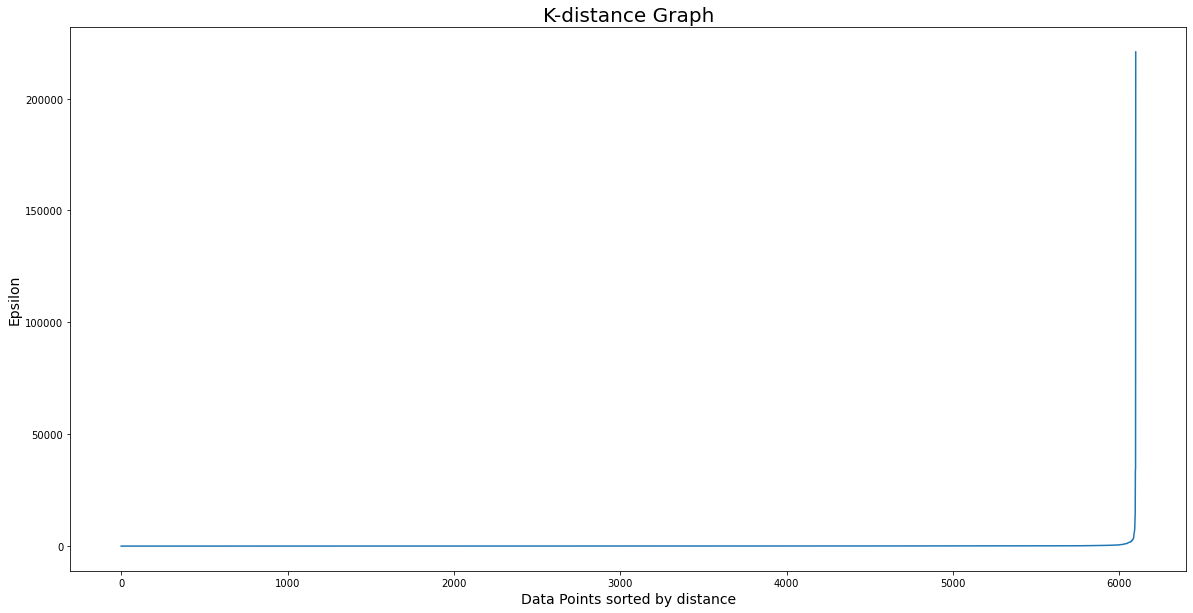

In [12]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)
                                         
                                         # Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [26]:
# specify & fit model
model = DBSCAN(eps = 2500, min_samples = 10).fit(features)
outliers = features[model.labels_ == -1]
print(len(outliers))

187
